# **Sistema Não Lineares**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Sistemas Não Lineares</a>
  </li>
  <ul>
      <li><a href="#scrollTo=E2wcnL1ak8bG&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=pFFXXiPXkxvA&uniqifier=1">Funções comuns</a></li>
    <li>Equações não lineares
      <ul>
          <li><a href="#scrollTo=4Vd2bqLKpwpr&uniqifier=1">Método da Bisseção</a></li>
          <li><a href="#scrollTo=JpN1O-_mHgEp&uniqifier=1">Método de Newton Rapshon</a></li>
      </ul>
    </li>
    <li>Sistemas não lineares
        <ul>
          <li><a href="#scrollTo=6X8hhhuyhZHC&uniqifier=1">Extensão do Método de Newton Rapshon</a></li>
      </ul>
    </li>
    <li><a href="#scrollTo=BP3sHmVDk-s1&uniqifier=1">Aplicações</a></li>
  </ul>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

## Introdução


Dado f, e um intervalo onde ela é continua e tem uma possivel intersecção com o eixo-x:

Seja $f \in C[a,b]$, dizemos que $x$ é solução quando $f(x) = 0$.

Tal como $x - A*cos(2*x) - b = 0$

Para resolver esse problema computacionalmente, utilizamos métodos iterativos. Assim, é necessário chutar o vetor $x_{0}$ e aproximar a cada iteração $x_{k}$ de $x$.

Dessa forma, critérios de parada devem ser estabelecidos. 

$\left\{\begin{matrix}
 (1)Limite\space  de  \space iterações & k & =  & k_{kmax}\\ 
 (2)Erro \space absoluto: & |x_{k} - x_{k-1}| & <  & e\\
 (3)Erro \space relativo: & |x_{k} - x_{k-1}| & <  & e|x_k| \\
 (4)Teste \space do \space Resíduo: & |f(x_k)| & <  & e \\
\end{matrix}\right.$

O primeiro critério é indispensavel, para caso o método não convergir ou demorar para atingir o $|f(x_k)| < e$.Em aplicações, veremos que esses critérios estão sucetiveis a falsos positivos.

## Funções comuns

In [ ]:
import time

# Decorator timeit
# Retorna o tempo de excução da função
# Não modifica a função.
# Para mais informações sobre decorators e timeit:
# https://medium.com/pythonhive/python-decorator-to-measure-the-execution-time-of-methods-fa04cb6bb36d
def timeit(method):
    def timed(*args, **kw):
        ts = time.time();
        result = method(*args, **kw);

        te = time.time();

        # Armazenar resultado
        if 'log_time' in kw:
            name = kw.get('log_name', method.__name__);
            kw['log_time'][name].append((te - ts) * 1000);
        else:
            print("%r  %2.5f ms" % (method.__name__, (te - ts) * 1000));
        return result
    return timed

## Método da Bissecção

Esse método é simplesmente uma busca binária, em que o intervalo de busca é divido ao meio, mas sempre conferindo a possibilidade de a raiz está dentro do intervalo.

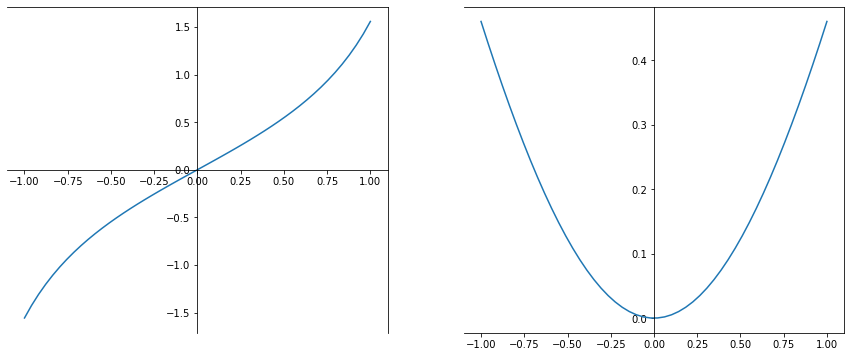

In [62]:
 # Cria quadro
fig, ax = plt.subplots(1,2, figsize=(15,6));

# intervalo
x = np.linspace(-1, 1);

# f(x) = y
y = []
for i in x:
  y.append(np.math.tan(i));

y1 = []
for i in x:
  y1.append(1 - np.math.cos(i));

# Centralizar eixos
ax[0].spines['left'].set_position('center')
ax[0].spines['bottom'].set_position('center')
ax[1].spines['left'].set_position('center')

# Plot time
ax[0].plot(x, y);
ax[1].plot(x, y1);

plt.show();


Note, pela figura 2, se a função é par no intervalo, e $|a| \neq |b|$, então o método não pode calcular uma solução.

Se queremos encontrar f(x) = tan(x) = 0 no intervalo [-1, 0.75].

Pela figura 1, podemos observar que se f(X) passa por y = 0, então $f(x_1) * f(x_2) < 0$.

Para estreitar o intervalo e aproximar-se da raiz, calcula-se o meio do intervalo $x_{mid} = (x_1 + x_2) /  2$

$x_2$ recebe $x_{mid}$ se $f(x_1)f(x_{mid}) < 0$

$x_1$ recebe $x_{mid}$ se $f(x_{mid})f(x_2) < 0$ 

O método começa a convergir quando o intervalo é suficientemente pequeno. $|x_1 - x_2| < e$

Além disso, facilmente observa-se a complexidade como: $\delta x$ é dividido por 2 a cada iteração. Portanto na iteração n temos $\delta x / 2^n = e$ => $ n = \log_2(\delta x / e) $

In [72]:
# Recebe uma função func, e o intervalo [a, b] onde há uma possível solução.
def bisection(func, a, b, e=1.0e-9):
  fa = func(a);
  
  if(fa == 0.0):
    return a; 
  
  fb = func(b);

  if(fb == 0.0):
    return b;

  
  try:
    if( fa * fb > 0.0 ):
      raise NameError('NoSolution');
    
    n = np.ceil(np.log(np.abs(b - a)/e)/np.log(2.0));
    for i in np.arange(n):
      mid = 0.5*(a + b);
      fmid = func(mid);

      if(fmid == 0.0):
        return mid;
      
      if(fa * fmid < 0.0):
        fb = fmid;
        b = mid;
      else:
        fa = fmid;
        a = mid;
    return (a + b)/2.0;
  except NameError:
      print('This can not find a solution to this function in this range[a,b].')
      raise

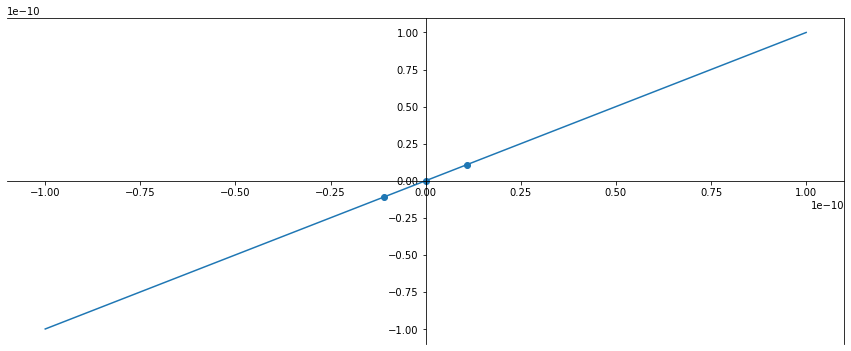

In [96]:
# Plot da tnagente no diferentes intervalos
x_sample = [];

x_sample.append(bisection(np.tan, -0.75, 0.75, e=1.0e-10));
x_sample.append(bisection(np.tan, -1, 0.75, e=1.0e-10));
x_sample.append(bisection(np.tan, -0.75, 1, e=1.0e-10));

y_sample = [np.tan(x_sample[0]), np.tan(x_sample[1]), np.tan(x_sample[2])];

# Cria quadro
fig, ax = plt.subplots(1,1, figsize=(15,6));

# intervalo
x = np.linspace(-1e-10, 1e-10);

# f(x) = y
y = []
for i in x:
  y.append(np.math.tan(i));

# Centralizar eixos
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Plot time
ax.plot(x, y);
ax.scatter(x_sample, y_sample);

plt.show();

No gráfico acima, vemos que a escolha do intervalo interfere na resposta, porém ela possuí uma precisão pré estimada de $10^{-10}$.

Estratégia: encontrar a tal que f(a) > 0 e f(b) < 0, então o método poe ser aplicado. 

## Método de Newton raphson / Secante

Esse método exige que $f(x)$ seja diferenciavel $f'(x)$ e pode ser obtido a partir da Expansão de Taylor.

Expansão de Taylor

$f(x) \approx f(x_k) + f'(x_k)(x - x_k)$

Para $f(\alpha) = 0$

$0 \approx f(x_k) + f'(x_k)(\alpha - x_k)$

$\alpha \approx x_k - (f(x_k)/f'(x_k))$

Portanto:

$(1) \space x_{k+1} \approx x_k - (f(x_k)/f'(x_k))$

Para evitar o cáculo de $df/dx$, aproximaremos usando o método da secante. Note que para aproximar a derivada no ponto, são necessários dois pontos, então o chute incial consiste agora de dois chutes.

$(2) \space f'(x_k) \approx (f(x_k) - f(x_{k-1})) / (x_l - x_{k-1})$

Juntando $(1)$ e $(2)$

$ x_{k+1} \approx x_k - (f(x_k)(x_l - x_{k-1})/f(x_k) - f(x_{k-1}))$


In [ ]:
def secant(func, a, b, x0, x1):

In [ ]:
# F(X) = 0
def newtonRapshon_ji(f, x, tol = 1.0e-9):
  def jacobiano(f, x):
    #     | f1/dx  f1/dy  f1/dz |
    # J = | f2/dx  f2/dy  f2/dz |
    #     | f3/dx  f3/dy  f3/dz |
    h = 1.0e-4
    n = x.shape[0]
    jac = np.zeros([n, n], dtype='float64')
    f0 = f(x) # f0 = { f1(x), f2(x), ..., fn(x) }
    for i in np.arange(n):
      aux = x[i]
      x[i] = aux + h  # x = {x0, ..., xi + h, ..., xn } ; avança x na direção ith
      f1 = f(x)       # f1 = { f1/di, f2/di, ..., fn/di }
      x[i] = aux
      jac[:, i] = (f1 - f0) / h
    return jac, f0
  
  for i in np.arange(30):
    jac, f0 = jacobiano(f, x)
  
    # the solutions is near enough of f(X) ~ 0
    if(np.sqrt(np.dot(f0, f0)) < tol):
      return x
    else:
      jac_inv = inverter_matrix(jac)
      
      # x_k_new = x_k - (jacobiana_inversa @ F(x_k)) 
      dx = jac_inv.dot(f0)
      x = x - dx
      if(1.0 > np.max(np.abs(x))):
        y = 1.0
      else:
        y = np.max(np.abs(x));
      
      # Se dx for indicar pouco deslocamento:
      if(np.sqrt(np.dot(dx, dx)) < tol*y):
        return x
  print('The solution is far yet.')
  return -1

In [ ]:
def test_jac_inv():
  x = np.array([0.5, 1.5], dtype='float64')
  bad_guess = np.array([1.5, 2.5], dtype='float64')


  startTimer()
  print(newtonRapshon_j(f, np.copy(x)))
  getTimer()

  startTimer()
  print(fsolve(f, x))
  getTimer()

  startTimer()
  print(newtonRapshon_j(f, np.copy(bad_guess)))
  getTimer()

  startTimer()
  print(fsolve(f, bad_guess))
  getTimer()

In [ ]:
def newtonRapshon_j(f, x, tol = 1.0e-9):
  # F(X) = 0
  # O critério de parada é a solução está próxima a zero,
  # Ou -1 se estiver muito longe.
  def jacobiano(f, x):
    #     | f1/dx  f1/dy  f1/dz |
    # J = | f2/dx  f2/dy  f2/dz |
    #     | f3/dx  f3/dy  f3/dz |
    h = 1.0e-4
    n = x.shape[0]
    jac = np.zeros([n, n], dtype='float64')
    f0 = f(x) # f0 = { f1(x), f2(x), ..., fn(x) }
    for i in np.arange(n):
      aux = x[i]
      x[i] = aux + h # x = {x0, ..., xi + h, ..., xn } ; avança x na direção ith
      f1 = f(x)       # f1 = { f1/di, f2/di, ..., fn/di }
      x[i] = aux
      jac[:, i] = (f1 - f0) / h
    
    return jac, f0
  
  for i in np.arange(30):
    jac, f0 = jacobiano(f, x)
    if(np.sqrt(np.dot(f0, f0)) < tol):
      return x
    else:
      A, b = gaussPivot(jac, -f0)
      dx = backSubstituion(A, b)
      x = x + dx
      if(1.0 > np.max(np.abs(x))):
        y = 1.0
      else:
        y = np.max(np.abs(x))
      
      if(np.sqrt(np.dot(dx, dx)) < tol*y):
        return x
  print('The solution is far yet.')
  return -1

# Aplicações

## A resolução da Equação da Circunferência

Dado a equação do  circulo: 

$(x - a)^2 + (y - b)^2 = R^2$

E três pontos que passam por ele $(8.21, 0), (0.34, 6.62), (5.96,-1.12)$ que retornam o raio.

Encontra $a,b$ e $R$

In [ ]:
def f_circ(a, b, r):
  n = 3
  f = np.zeros([n], dtype = 'float64')
  
  R = r*r;
  f[0] = ((8.21 - a)*(8.21 - a)) + ((0.0 - b)*(0.0 - b)) - R
  f[1] = ((0.34 - a)*(0.34 - a)) + ((6.62 - b)*(6.62 - b)) - R
  f[2] = ((5.96 - a)*(5.96 - a)) + ((-1.12 - b)*(-1.12 - b)) - R
  return f

## Pontos de interseção

In [ ]:
def f(x):
  # Intersecção entre circulo e hipérbole:
  # f1(x, y) = x^2 + y^2 - 3 = 0
  # f2(x, y) = xy - 1 = 0
  n = x.shape[0]
  f = np.zeros([n], dtype = 'float64')
  f[0] = (x[0]*x[0]) + (x[1]*x[1]) - 3
  f[1] = (x[0]*x[1]) - 1
  return f

## Aproximando raizes